In [1]:
import numpy as np
from os.path import abspath, expanduser
from ECOv002_CMR import ECOSTRESS_CMR_search, download_file, GranuleID, download_ECOSTRESS_granule
from ECOv002_granules import ET_COLORMAP
from PTJPLSM import PTJPLSM

In [2]:
import logging

logging.getLogger().handlers = []

In [3]:
aquisition_date = "2024-10-22"
orbit = 35698
scene = 14
tile = "11SPS"
ECOSTRESS_download_directory = abspath(expanduser("~/data/ECOSTRESS"))
static_directory = abspath(expanduser("~/data/JET_static"))
working_directory = abspath(expanduser("~/data/ECOv002_L3T_L4T_JET"))

In [4]:
L2T_LSTE_granule = download_ECOSTRESS_granule(
    product="L2T_LSTE", 
    orbit=orbit,
    scene=scene,
    tile=tile, 
    aquisition_date=aquisition_date,
    parent_directory=ECOSTRESS_download_directory
)

L2T_LSTE_granule

L2TLSTE("/Users/halverso/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01")

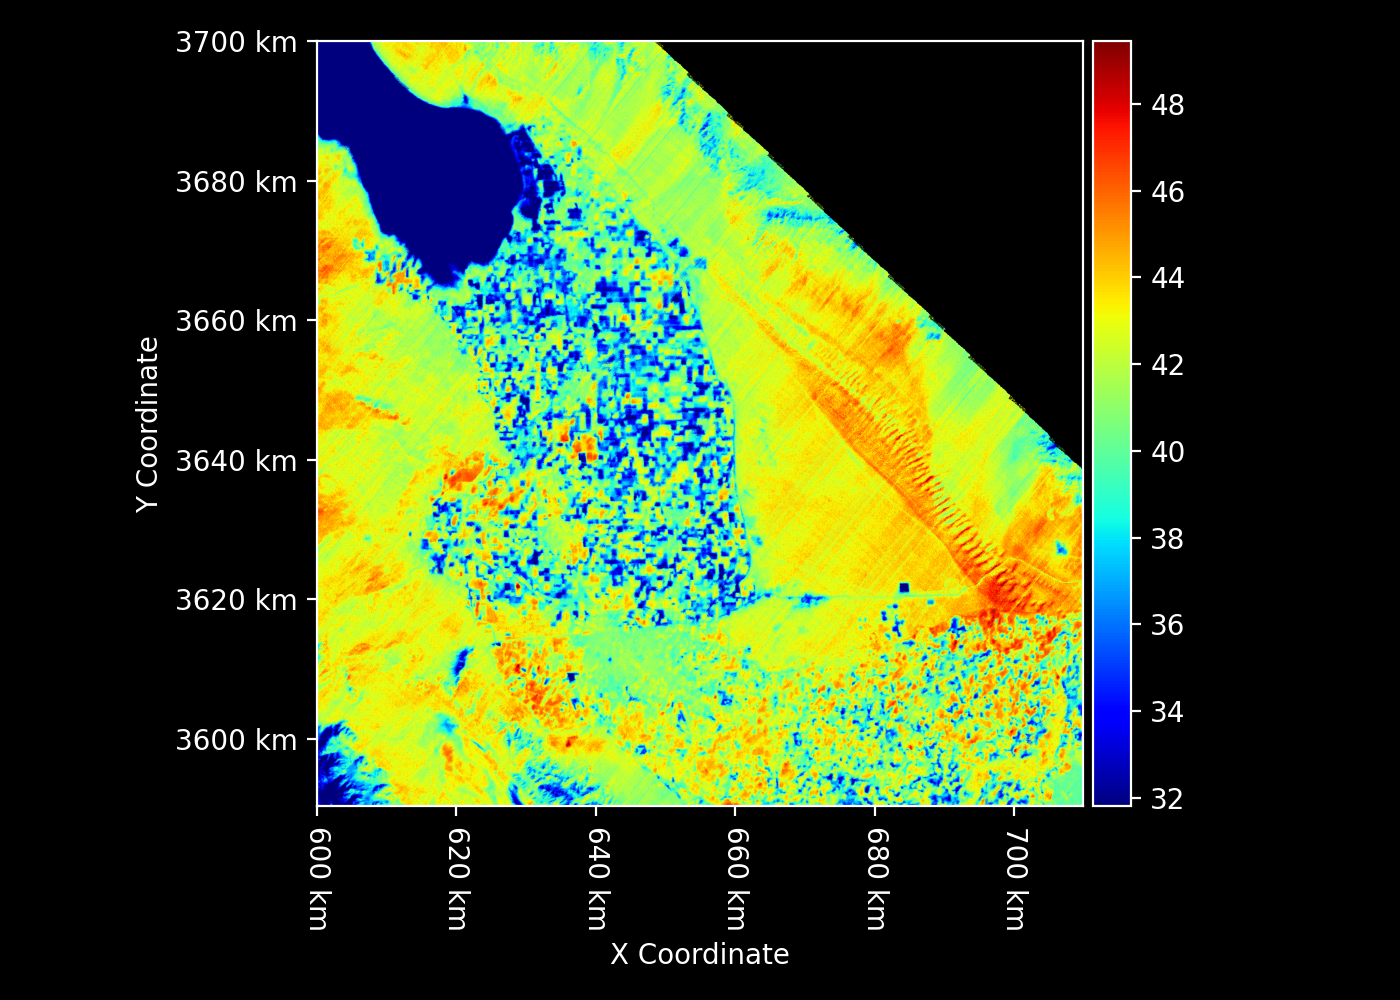

In [5]:
ST_C = L2T_LSTE_granule.ST_C
ST_C

In [6]:
L2T_STARS_granule = download_ECOSTRESS_granule(
    product="L2T_STARS", 
    tile=tile, 
    aquisition_date=aquisition_date,
    parent_directory=ECOSTRESS_download_directory
)

L2T_STARS_granule

L2TSTARS("/Users/halverso/data/ECOSTRESS/ECOv002_L2T_STARS_11SPS_20241022_0713_01")

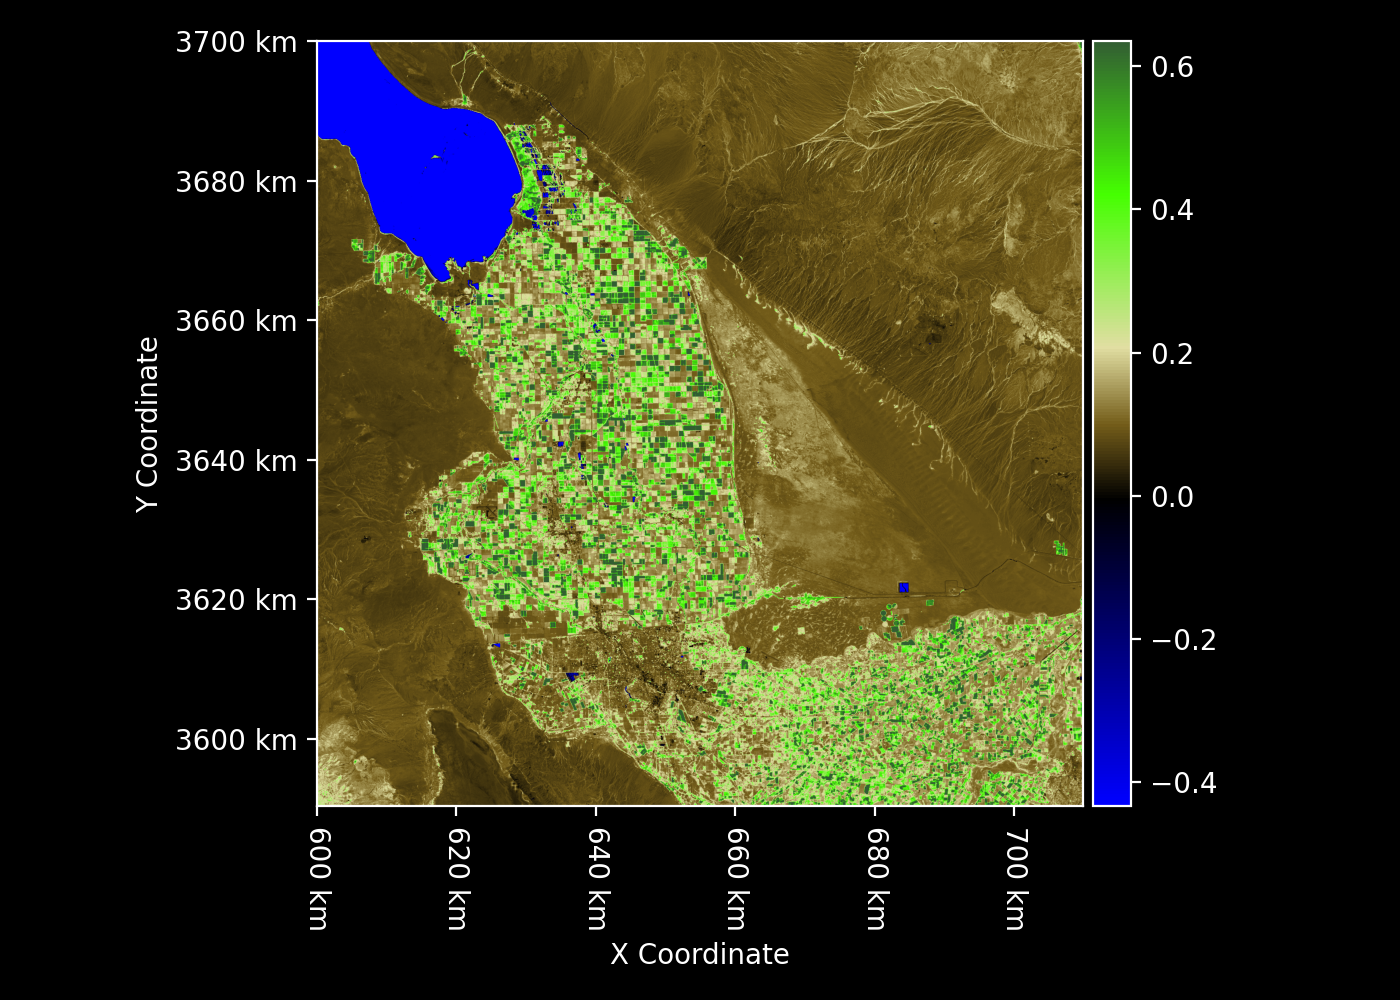

In [7]:
NDVI = L2T_STARS_granule.NDVI
NDVI

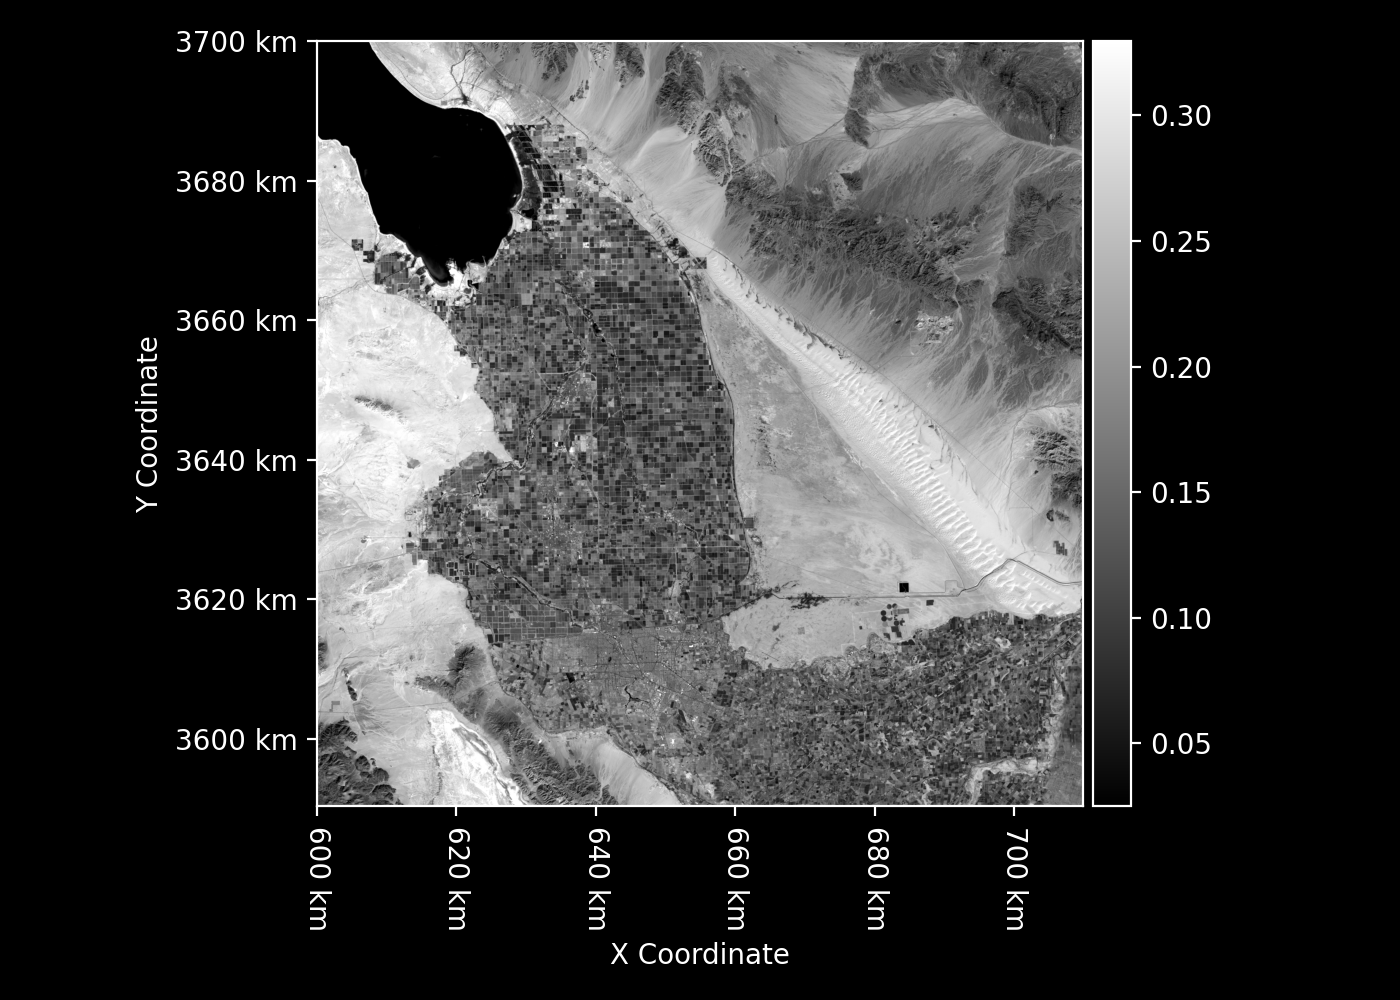

In [8]:
albedo = L2T_STARS_granule.albedo
albedo

In [9]:
L3T_SEB_granule = download_ECOSTRESS_granule(
    product="L3T_SEB", 
    orbit=orbit,
    scene=scene,
    tile=tile, 
    aquisition_date=aquisition_date,
    parent_directory=ECOSTRESS_download_directory
)

L3T_SEB_granule

L3TSEB("/Users/halverso/data/ECOSTRESS/ECOv002_L3T_SEB_35698_014_11SPS_20241022T183627_0713_01")

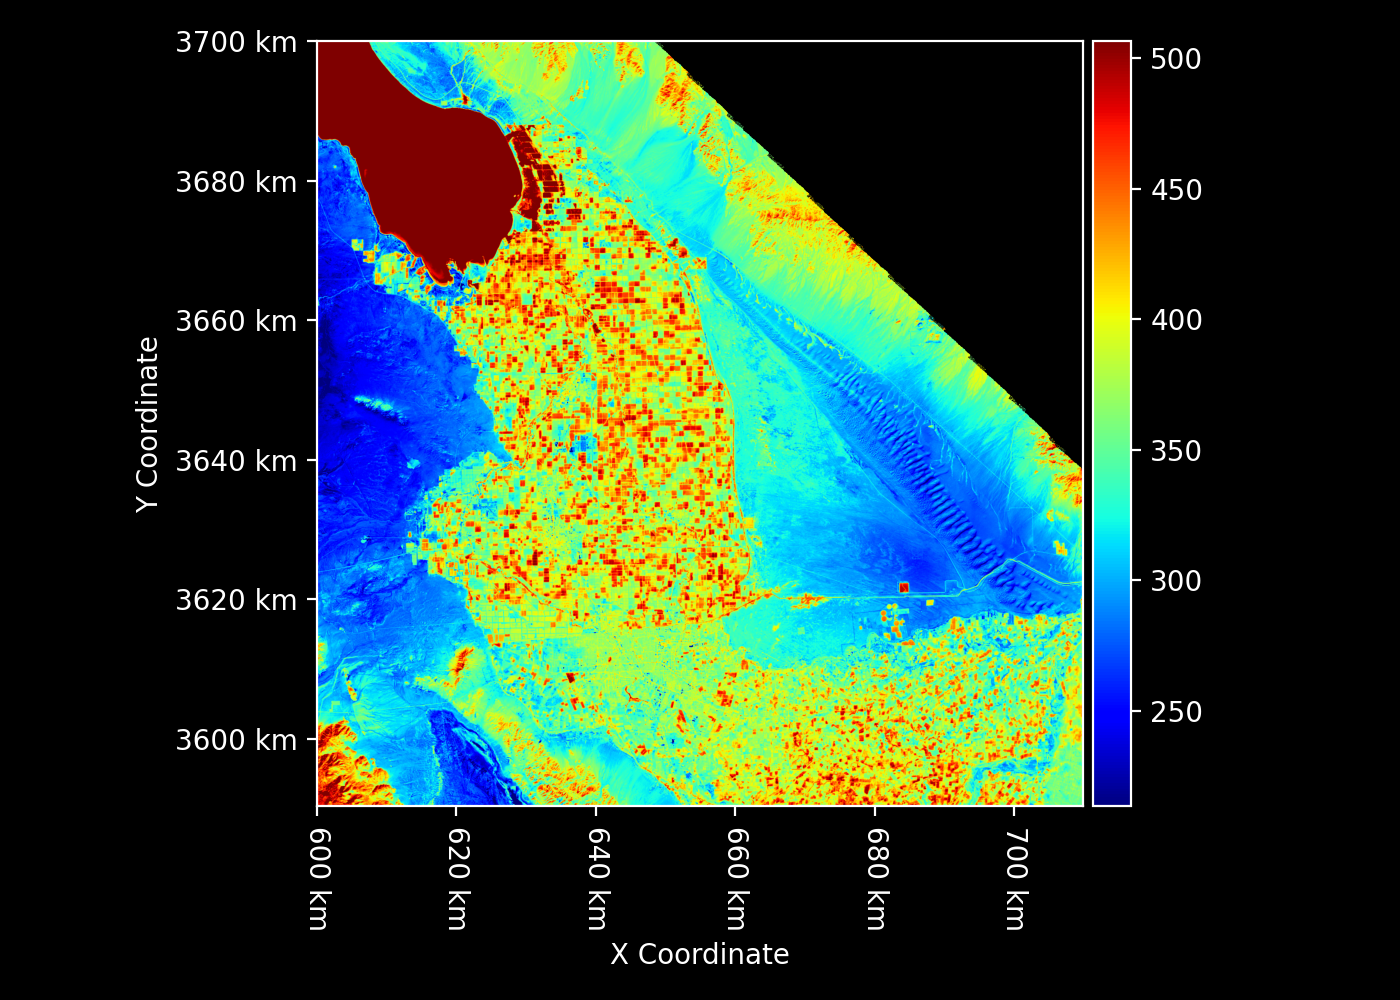

In [10]:
Rn = L3T_SEB_granule.variable("Rn")
Rn

In [11]:
L3T_MET_granule = download_ECOSTRESS_granule(
    product="L3T_MET", 
    orbit=orbit,
    scene=scene,
    tile=tile, 
    aquisition_date=aquisition_date,
    parent_directory=ECOSTRESS_download_directory
)

L3T_MET_granule

L3TMET("/Users/halverso/data/ECOSTRESS/ECOv002_L3T_MET_35698_014_11SPS_20241022T183627_0713_01")

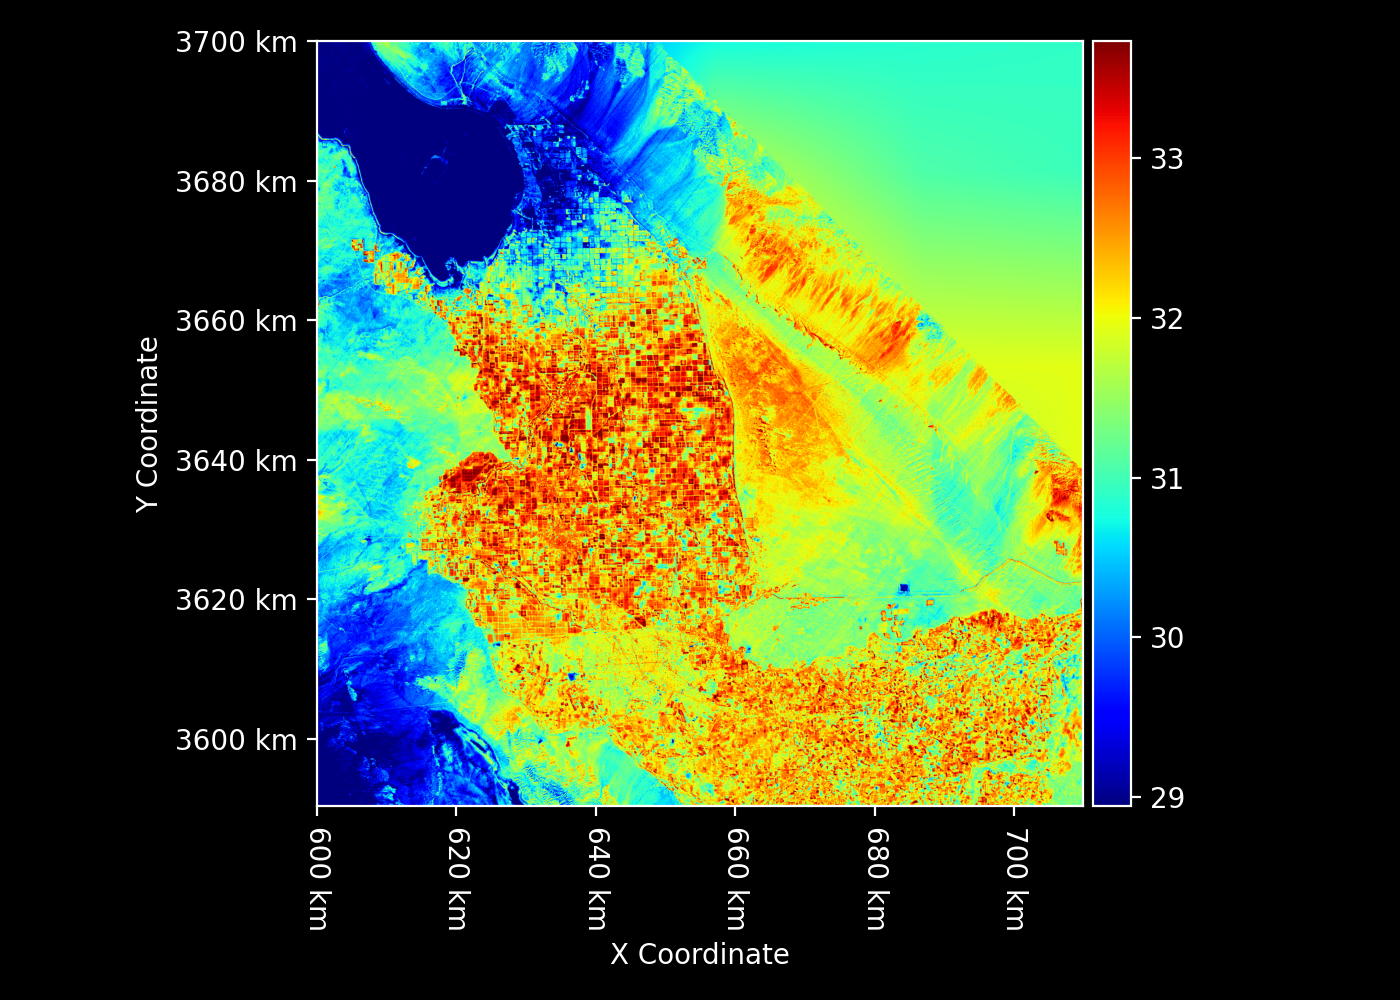

In [12]:
Ta_C = L3T_MET_granule.variable("Ta")
Ta_C

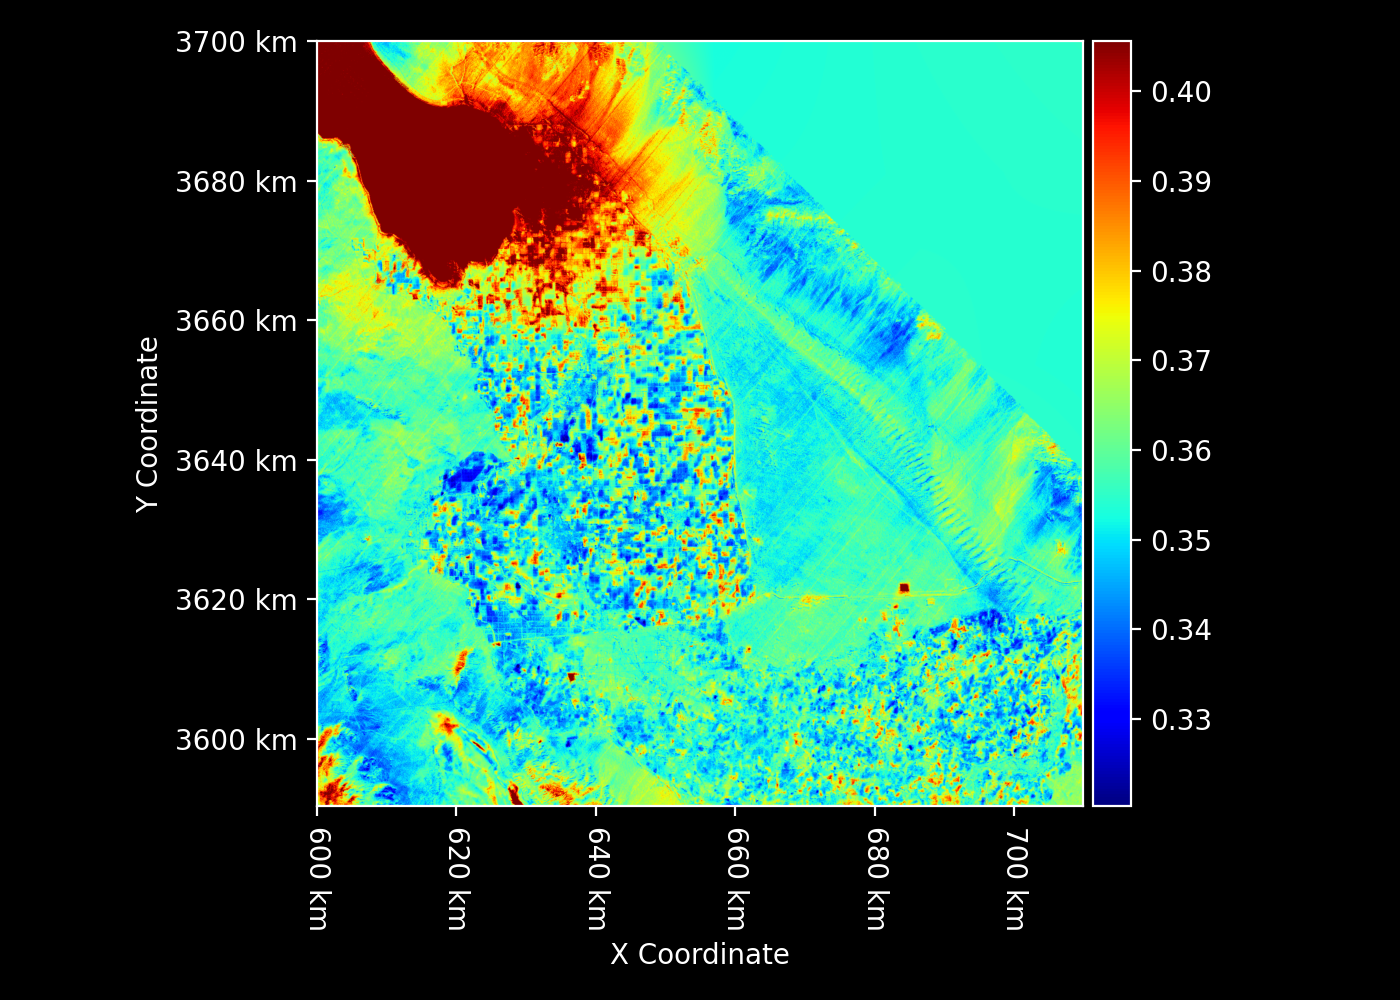

In [13]:
RH = L3T_MET_granule.variable("RH")
RH

In [ ]:
results = PTJPLSM(
    NDVI=NDVI,
    Ta_C=Ta_C,
    RH=RH,
    Rn=Rn,
    ST_C=ST_C,
    albedo=albedo
)

ValueError: soil heat flux (G) not given

In [ ]:
LE = results["LE"]
LE.cmap = ET_COLORMAP
LE.to_geotiff("example_LE.tif")
LE